# Credit Risk Model

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("miadul/personal-finance-ml-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\mutch_lf652j0\.cache\kagglehub\datasets\miadul\personal-finance-ml-dataset\versions\1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("C:/Users/mutch_lf652j0/.cache/kagglehub/datasets/miadul/personal-finance-ml-dataset/versions/1/synthetic_personal_finance_dataset.csv")


In [5]:
df.head()

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


In [6]:
df.columns

Index(['user_id', 'age', 'gender', 'education_level', 'employment_status',
       'job_title', 'monthly_income_usd', 'monthly_expenses_usd',
       'savings_usd', 'has_loan', 'loan_type', 'loan_amount_usd',
       'loan_term_months', 'monthly_emi_usd', 'loan_interest_rate_pct',
       'debt_to_income_ratio', 'credit_score', 'savings_to_income_ratio',
       'region', 'record_date'],
      dtype='object')

In [7]:
df.shape

(32424, 20)

In [8]:
df.isna().sum()

user_id                        0
age                            0
gender                         0
education_level                0
employment_status              0
job_title                      0
monthly_income_usd             0
monthly_expenses_usd           0
savings_usd                    0
has_loan                       0
loan_type                  19429
loan_amount_usd                0
loan_term_months               0
monthly_emi_usd                0
loan_interest_rate_pct         0
debt_to_income_ratio           0
credit_score                   0
savings_to_income_ratio        0
region                         0
record_date                    0
dtype: int64

In [9]:
#Loan type has "null"values

In [10]:
df["loan_type"]

0              NaN
1        Education
2              NaN
3         Business
4              NaN
           ...    
32419          Car
32420         Home
32421          NaN
32422          NaN
32423          NaN
Name: loan_type, Length: 32424, dtype: object

In [11]:
df["has_loan"]

0         No
1        Yes
2         No
3        Yes
4         No
        ... 
32419    Yes
32420    Yes
32421     No
32422     No
32423     No
Name: has_loan, Length: 32424, dtype: object

In [12]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [13]:
df["gender"].value_counts().get("Other", 0)

1279

In [14]:
df.duplicated().sum()

0

In [15]:
#No duplicates in the dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_interest_rate_pct

In [17]:
df.nunique()

user_id                    32424
age                           52
gender                         3
education_level                5
employment_status              4
job_title                      9
monthly_income_usd         30449
monthly_expenses_usd       31319
savings_usd                32415
has_loan                       2
loan_type                      4
loan_amount_usd            12993
loan_term_months              10
monthly_emi_usd            12948
loan_interest_rate_pct      2684
debt_to_income_ratio        1541
credit_score                 551
savings_to_income_ratio      991
region                         5
record_date                 1461
dtype: int64

In [18]:
df.describe()

,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio
count,32424.000000,32424.000000,32424.000000,3.242400e+04,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000
mean,43.415865,4027.863185,2419.444709,2.437520e+05,100114.735992,58.500000,3092.992339,6.616332,1.194881,575.260424,5.045431
std,14.978246,1916.773353,1388.893084,1.915772e+05,152536.588635,104.865373,6478.939776,9.472964,3.761964,159.023227,2.851344
min,18.000000,500.000000,150.010000,6.359600e+02,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.100000
25%,30.000000,2657.795000,1397.497500,8.629155e+04,0.000000,0.000000,0.000000,0.000000,0.000000,437.000000,2.580000
50%,43.000000,3997.740000,2219.575000,2.017003e+05,0.000000,0.000000,0.000000,0.000000,0.000000,575.000000,5.040000
75%,56.000000,5351.607500,3254.037500,3.589662e+05,189499.070000,60.000000,3574.567500,13.140000,0.920000,714.000000,7.510000
max,69.000000,12404.050000,10082.710000,1.237774e+06,499954.750000,360.000000,47723.840000,30.000000,90.670000,850.000000,10.000000


In [19]:
[feature for feature in df.columns if df[feature].isnull().sum() > 0]

['loan_type']

In [20]:
# i will drop the loan_type column, as this shouldn't have any significant impact on our model. The loan amount will be in the input

In [21]:
df.drop(columns="loan_type", inplace= True)

In [22]:
df.head(2)

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,0.00,0,0.0,0.00,0.0,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,146323.34,36,4953.5,13.33,1.4,543,6.16,North America,2022-02-13


In [23]:
#Change currency to ZAR, to make it more relateable (current exchange rate is $1 = R17.72)

In [24]:
df["monthly_income_zar"]= df["monthly_income_usd"]*17.72

In [25]:
df.head(2)

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,monthly_income_zar
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,0.00,0,0.0,0.00,0.0,430,8.68,Other,2024-01-09,62581.5468
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,146323.34,36,4953.5,13.33,1.4,543,6.16,North America,2022-02-13,62582.2556


In [26]:
df.drop(columns="monthly_income_usd", inplace=True)

In [27]:
df["monthly_expenses_zar"]=df["monthly_expenses_usd"]*17.72
df["savings_zar"]=df["savings_usd"]*17.72
df["loan_amount_zar"]=df["loan_amount_usd"]*17.72
df["monthly_emi_zar"]=df["monthly_emi_usd"]*17.72


In [28]:
df.drop(columns=["monthly_expenses_usd", "savings_usd", "loan_amount_usd", "monthly_emi_usd"], inplace=True)

In [29]:
df.head(2)

,user_id,age,gender,education_level,employment_status,job_title,has_loan,loan_term_months,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,monthly_income_zar,monthly_expenses_zar,savings_zar,loan_amount_zar,monthly_emi_zar
0,U00001,56,Female,High School,Self-employed,Salesperson,No,0,0.00,0.0,430,8.68,Other,2024-01-09,62581.5468,20955.4948,6.514847e+06,0.000000e+00,0.00
1,U00002,19,Female,PhD,Employed,Salesperson,Yes,36,13.33,1.4,543,6.16,North America,2022-02-13,62582.2556,41960.7828,4.622600e+06,2.592850e+06,87776.02


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   has_loan                 32424 non-null  object 
 7   loan_term_months         32424 non-null  int64  
 8   loan_interest_rate_pct   32424 non-null  float64
 9   debt_to_income_ratio     32424 non-null  float64
 10  credit_score             32424 non-null  int64  
 11  savings_to_income_ratio  32424 non-null  float64
 12  region                   32424 non-null  object 
 13  record_date              32424 non-null  object 
 14  monthly_income_zar    

In [31]:
df.shape

(32424, 19)

In [32]:
df.groupby(["debt_to_income_ratio","credit_score","monthly_income_zar"]).size()

debt_to_income_ratio  credit_score  monthly_income_zar
0.00                  300           8860.0000             2
                                    18811.7292            1
                                    27408.4100            1
                                    28659.9736            1
                                    36538.1084            1
                                                         ..
81.14                 810           8860.0000             1
82.02                 796           8860.0000             1
85.57                 752           8860.0000             1
86.61                 538           8860.0000             1
90.67                 806           8860.0000             1
Length: 32074, dtype: int64

In [33]:
#No observed correlation

In [34]:
df[["debt_to_income_ratio", "credit_score", "savings_to_income_ratio"]].corr()


,debt_to_income_ratio,credit_score,savings_to_income_ratio
debt_to_income_ratio,1.000000,0.012049,-0.000159
credit_score,0.012049,1.000000,0.002407
savings_to_income_ratio,-0.000159,0.002407,1.000000


<Axes: xlabel='monthly_income_zar', ylabel='Count'>

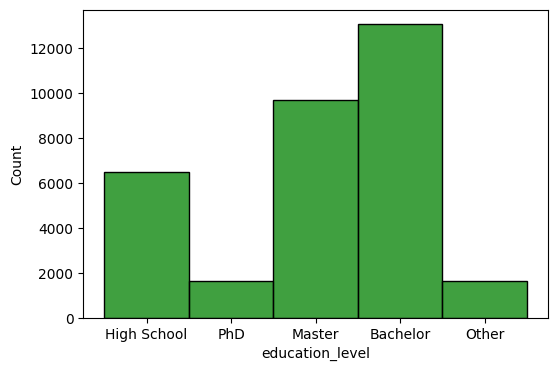

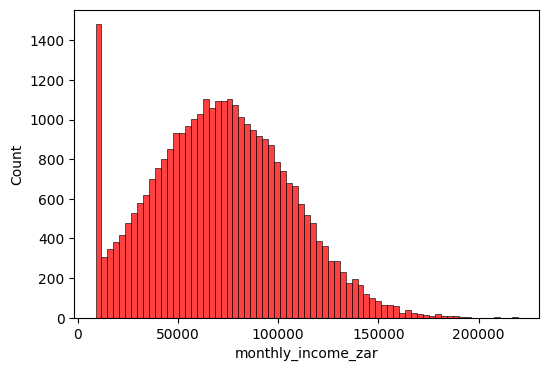

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="education_level", color="g")

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="monthly_income_zar", color="r")

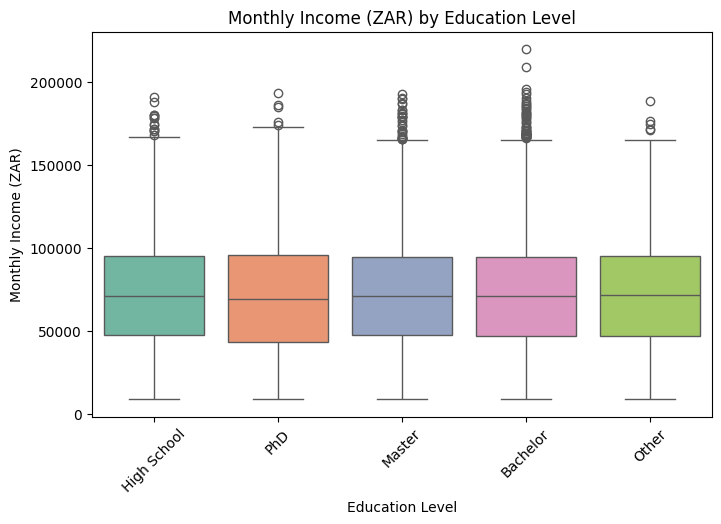

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="education_level",
    y="monthly_income_zar",
    hue="education_level",    
    palette="Set2",
    legend=False              
)

plt.xticks(rotation=45)
plt.title("Monthly Income (ZAR) by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Monthly Income (ZAR)")
plt.show()

# Train-Test Split
# Development - Validation and Hold-put

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
features=["debt_to_income_ratio","credit_score","savings_to_income_ratio"]
X=df[features]

In [39]:
X_dev, X_temp = train_test_split(X, test_size=0.4, random_state=42)
X_val, X_hold = train_test_split(X_temp, test_size = 0.5, random_state=42)

In [40]:
print(f" Development set:{len(X_dev)}rows")
print(f" Validation set:{len(X_val)}rows")
print(f" Hold-out set:{len(X_hold)}rows")

 Development set:19454rows
 Validation set:6485rows
 Hold-out set:6485rows


In [41]:
#scaling for K-Means

In [42]:
scaler= StandardScaler()

In [43]:
X_dev_scaled = scaler.fit_transform(X_dev)
X_val_scaled = scaler.transform(X_val)
X_hold_scaled = scaler.transform(X_hold)

In [44]:
#fit clustering on development set

In [45]:
Kmeans = KMeans(n_clusters=3,random_state=42)
Kmeans.fit(X_dev_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [46]:
X_dev_labels = Kmeans.predict(X_dev_scaled)
X_val_labels = Kmeans.predict(X_val_scaled)
X_hold_labels = Kmeans.predict(X_hold_scaled)

In [47]:
dev_profiles = pd.DataFrame(X_dev, columns=features)
dev_profiles['cluster'] = X_dev_labels
cluster_summary = dev_profiles.groupby('cluster')[features].mean()
print(cluster_summary)

         debt_to_income_ratio  credit_score  savings_to_income_ratio
cluster                                                             
0                    0.814711    436.574417                 5.057568
1                    0.838440    712.195431                 5.015510
2                   23.512739    581.904290                 5.218020


In [48]:
risk_mapping = {
    cluster_summary['debt_to_income_ratio'].idxmax(): 'High Risk',
    cluster_summary['debt_to_income_ratio'].idxmin(): 'Low Risk'
}

In [49]:
for c in set(range(3)) - set(risk_mapping.keys()):
    risk_mapping[c] = 'Medium Risk'

dev_profiles['risk_category'] = dev_profiles['cluster'].map(risk_mapping)

In [50]:
dev_profiles['risk_score'] = (
    (dev_profiles['debt_to_income_ratio'] / dev_profiles['debt_to_income_ratio'].max()) -
    (dev_profiles['credit_score'] / dev_profiles['credit_score'].max()) -
    (dev_profiles['savings_to_income_ratio'] / dev_profiles['savings_to_income_ratio'].max())
)

In [51]:
val_profiles = pd.DataFrame(X_val, columns=features)
val_profiles['cluster'] = X_val_labels
val_profiles['risk_category'] = val_profiles['cluster'].map(risk_mapping)

hold_profiles = pd.DataFrame(X_hold, columns=features)
hold_profiles['cluster'] = X_hold_labels
hold_profiles['risk_category'] = hold_profiles['cluster'].map(risk_mapping)

In [53]:
print(dev_profiles.sample(10))

       debt_to_income_ratio  credit_score  savings_to_income_ratio  cluster  \
24041                  1.00           693                     5.23        1   
3331                   0.00           424                     0.81        0   
7987                   0.00           404                     2.44        0   
20537                 20.42           769                     7.97        2   
6107                   0.86           764                     2.35        1   
15621                  1.97           411                     2.42        0   
2311                   0.00           410                     4.29        0   
2843                   1.20           401                     9.47        0   
16006                  0.00           686                     2.22        1   
15146                  0.00           733                     1.83        1   

      risk_category  risk_score  
24041   Medium Risk   -1.326102  
3331       Low Risk   -0.579824  
7987       Low Risk   -0.719

,debt_to_income_ratio,credit_score,savings_to_income_ratio,cluster,risk_category,risk_score
17895,0.18,467,9.12,0,Low Risk,-1.459217
361,0.00,722,7.88,1,Medium Risk,-1.637412
9217,0.00,763,7.88,1,Medium Risk,-1.685647
17691,0.00,489,5.11,0,Low Risk,-1.086294
16697,0.00,803,2.65,1,Medium Risk,-1.209706
3870,4.81,539,3.01,0,Low Risk,-0.876473
12796,0.95,770,9.73,1,Medium Risk,-1.867300
17762,1.57,310,5.43,0,Low Risk,-0.888564
6577,0.41,487,0.80,0,Low Risk,-0.647942
19698,4.88,326,2.85,0,Low Risk,-0.609032
